# Implementation of Regression models on Household Power Consumption

### Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Ingestion
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model
* Hypertuning the model

### 1. Problem statement.
* The dataSet consists of 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
* Using this data we need to predict the energy consumption of the houshold.  

### 2. Data Collection.
* The Dataset is collected from Website named, UCI Machine Learning Repository.
* Link for dataset - https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption
* This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).



## Importing important libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pickle
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso , ElasticNet, RidgeCV , LassoCV , ElasticNetCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import scikitplot as skl
sns.set()

## 3. Data Ingestion

### Loading Dataset

In [2]:
df = pd.read_csv(r'C:\Users\bolt0\Data science\house electricity dataset\household_power_consumption.txt' , sep=';')

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.sample(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
558897,8/1/2008,20:21:00,1.898,0.302,240.350,8.000,0.000,1.000,0.0
1130652,8/2/2009,21:36:00,0.852,0.000,241.810,4.200,2.000,0.000,0.0
518163,11/12/2007,13:27:00,5.232,0.450,234.310,22.400,0.000,36.000,17.0
1986863,26/9/2010,11:47:00,?,?,?,?,?,?,NaN
433641,13/10/2007,20:45:00,3.208,0.204,238.970,13.400,0.000,6.000,17.0


#### Shape and basic info about the data: 

In [5]:
df.shape

(2075259, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### Features information:

In [7]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

There are 9 columns or features in the dataset: 
* __Date__: Date in format dd/mm/yyyy
* __Time__: time in format hh:mm:ss
* __Global_active_power__: household global minute-averaged active power (in kilowatt)
* __Global_reactive_power__: household global minute-averaged reactive power (in kilowatt)
* __Voltage__: minute-averaged voltage (in volt)
* __Global_intensity__: household global minute-averaged current intensity (in ampere)
* __Sub_metering_1__: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
* __Sub_metering_2__: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
* __Sub_metering_3__: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


#### Since the dataset is too large so we will select a sample of the dataset having 100000 values and use it for all the study

In [8]:
df_sample = df.sample(30000)

In [9]:
df_sample

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1084390,7/1/2009,18:34:00,2.326,0.092,242.420,9.600,0.000,0.000,0.0
1550512,27/11/2009,11:16:00,2.520,0.432,239.300,10.600,0.000,0.000,18.0
1595798,28/12/2009,22:02:00,1.026,0.062,238.710,4.200,1.000,0.000,1.0
831384,16/7/2008,01:48:00,0.332,0.246,239.830,1.600,0.000,1.000,0.0
1925046,14/8/2010,13:30:00,0.158,0.000,242.750,0.600,0.000,0.000,1.0
...,...,...,...,...,...,...,...,...,...
1838098,15/6/2010,04:22:00,0.282,0.114,240.880,1.400,0.000,1.000,1.0
454675,28/10/2007,11:19:00,0.306,0.106,240.390,1.200,0.000,0.000,0.0
1978324,20/9/2010,13:28:00,2.638,0.000,238.240,11.000,37.000,0.000,1.0
275911,26/6/2007,07:55:00,1.572,0.350,238.750,6.800,0.000,2.000,17.0


##### Resetting the index of the sample dataframe

In [10]:
df_sample.reset_index(inplace = True , drop = True )

In [11]:
df_sample

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,7/1/2009,18:34:00,2.326,0.092,242.420,9.600,0.000,0.000,0.0
1,27/11/2009,11:16:00,2.520,0.432,239.300,10.600,0.000,0.000,18.0
2,28/12/2009,22:02:00,1.026,0.062,238.710,4.200,1.000,0.000,1.0
3,16/7/2008,01:48:00,0.332,0.246,239.830,1.600,0.000,1.000,0.0
4,14/8/2010,13:30:00,0.158,0.000,242.750,0.600,0.000,0.000,1.0
...,...,...,...,...,...,...,...,...,...
29995,15/6/2010,04:22:00,0.282,0.114,240.880,1.400,0.000,1.000,1.0
29996,28/10/2007,11:19:00,0.306,0.106,240.390,1.200,0.000,0.000,0.0
29997,20/9/2010,13:28:00,2.638,0.000,238.240,11.000,37.000,0.000,1.0
29998,26/6/2007,07:55:00,1.572,0.350,238.750,6.800,0.000,2.000,17.0


## 4. Data Cleaning


Data include 'nan' , ' ' , ',' and '?'  as a string.  We need to convert both to numpy nan.

In [12]:
df_sample.replace('?', np.nan ,inplace = True)
df_sample.replace(',', np.nan ,inplace = True)
df_sample.replace(' ', np.nan ,inplace = True)
df_sample.replace('nan', np.nan ,inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


#### Also we now create seperate columns for day,month,year,hour and minute from the Date and Time Columns

In [14]:
df_sample['Date'] = pd.to_datetime(df_sample['Date'])

df_sample['Day'] = df_sample['Date'].dt.day
df_sample['Month'] = df_sample['Date'].dt.month
df_sample['Year'] = df_sample['Date'].dt.year

In [15]:
df_sample['Hour'] = pd.to_datetime(df_sample['Time'], format='%H:%M:%S').dt.hour 
df_sample['Minutes'] = pd.to_datetime(df_sample['Time'], format='%H:%M:%S').dt.minute

#### Converting Datatype to float

In [16]:
for item in df_sample.columns:
    if df_sample[str(item)].dtype == 'O' and item != 'Time':
        df_sample[str(item)] = df_sample[str(item)].astype(float)   

In [17]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   30000 non-null  datetime64[ns]
 1   Time                   30000 non-null  object        
 2   Global_active_power    29607 non-null  float64       
 3   Global_reactive_power  29607 non-null  float64       
 4   Voltage                29607 non-null  float64       
 5   Global_intensity       29607 non-null  float64       
 6   Sub_metering_1         29607 non-null  float64       
 7   Sub_metering_2         29607 non-null  float64       
 8   Sub_metering_3         29607 non-null  float64       
 9   Day                    30000 non-null  int64         
 10  Month                  30000 non-null  int64         
 11  Year                   30000 non-null  int64         
 12  Hour                   30000 non-null  int64         
 13  M

### Null Values

In [18]:
df_sample.isnull().sum()

Date                       0
Time                       0
Global_active_power      393
Global_reactive_power    393
Voltage                  393
Global_intensity         393
Sub_metering_1           393
Sub_metering_2           393
Sub_metering_3           393
Day                        0
Month                      0
Year                       0
Hour                       0
Minutes                    0
dtype: int64

There are 393 null values in the dataset , Since the dataset has mostly float values so we will replace the null values by the median of the dataset.

In [19]:
for item in df_sample.columns:
    if df_sample[str(item)].isnull().sum() > 0:
        df_sample[str(item)] = df_sample[str(item)].fillna(df_sample[str(item)].median())

In [20]:
df_sample.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Day                      0
Month                    0
Year                     0
Hour                     0
Minutes                  0
dtype: int64

We have succesfully filled all the null values. Now we check for any duplicated rows.  
### Duplicated entries

In [21]:
df_sample.duplicated().sum()

0

There are __0__ duplicate entries in the dataframe.

### Creating Column For Total Metering

In [22]:
df_sample['Total_metering'] = df_sample['Sub_metering_1']+df_sample['Sub_metering_2']+df_sample['Sub_metering_3']

In [23]:
df_sample.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Hour,Minutes,Total_metering
0,2009-07-01,18:34:00,2.326,0.092,242.42,9.6,0.0,0.0,0.0,1,7,2009,18,34,0.0
1,2009-11-27,11:16:00,2.520,0.432,239.30,10.6,0.0,0.0,18.0,27,11,2009,11,16,18.0
2,2009-12-28,22:02:00,1.026,0.062,238.71,4.2,1.0,0.0,1.0,28,12,2009,22,2,2.0
3,2008-07-16,01:48:00,0.332,0.246,239.83,1.6,0.0,1.0,0.0,16,7,2008,1,48,1.0
4,2010-08-14,13:30:00,0.158,0.000,242.75,0.6,0.0,0.0,1.0,14,8,2010,13,30,1.0


In [24]:
df_sample.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Day', 'Month', 'Year', 'Hour', 'Minutes',
       'Total_metering'],
      dtype='object')

### Dropping non relevant columns: 

In [25]:
df_sample.drop(columns = ['Date' ,'Time','Sub_metering_1', 'Sub_metering_2','Sub_metering_3'] , inplace = True)

In [26]:
df_sample.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Day', 'Month', 'Year', 'Hour', 'Minutes',
       'Total_metering'],
      dtype='object')

# 5. EDA


### Description of the data

In [27]:
df_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,30000.0,1.081284,1.047376,0.078,0.310,0.594,1.5200,9.726
Global_reactive_power,30000.0,0.122393,0.111356,0.000,0.048,0.100,0.1920,1.080
Voltage,30000.0,240.830702,3.208258,225.020,239.010,241.020,242.8425,253.260
Global_intensity,30000.0,4.584353,4.403083,0.200,1.400,2.600,6.4000,42.800
Day,30000.0,15.752967,8.801140,1.000,8.000,16.000,23.0000,31.000
Month,30000.0,6.492133,3.449580,1.000,3.000,7.000,9.0000,12.000
Year,30000.0,2008.438333,1.132831,2006.000,2007.000,2008.000,2009.0000,2010.000
Hour,30000.0,11.485500,6.921179,0.000,5.000,11.000,18.0000,23.000
Minutes,30000.0,29.498233,17.391751,0.000,14.000,29.000,45.0000,59.000
Total_metering,30000.0,8.777767,12.866164,0.000,0.000,1.000,18.0000,128.000


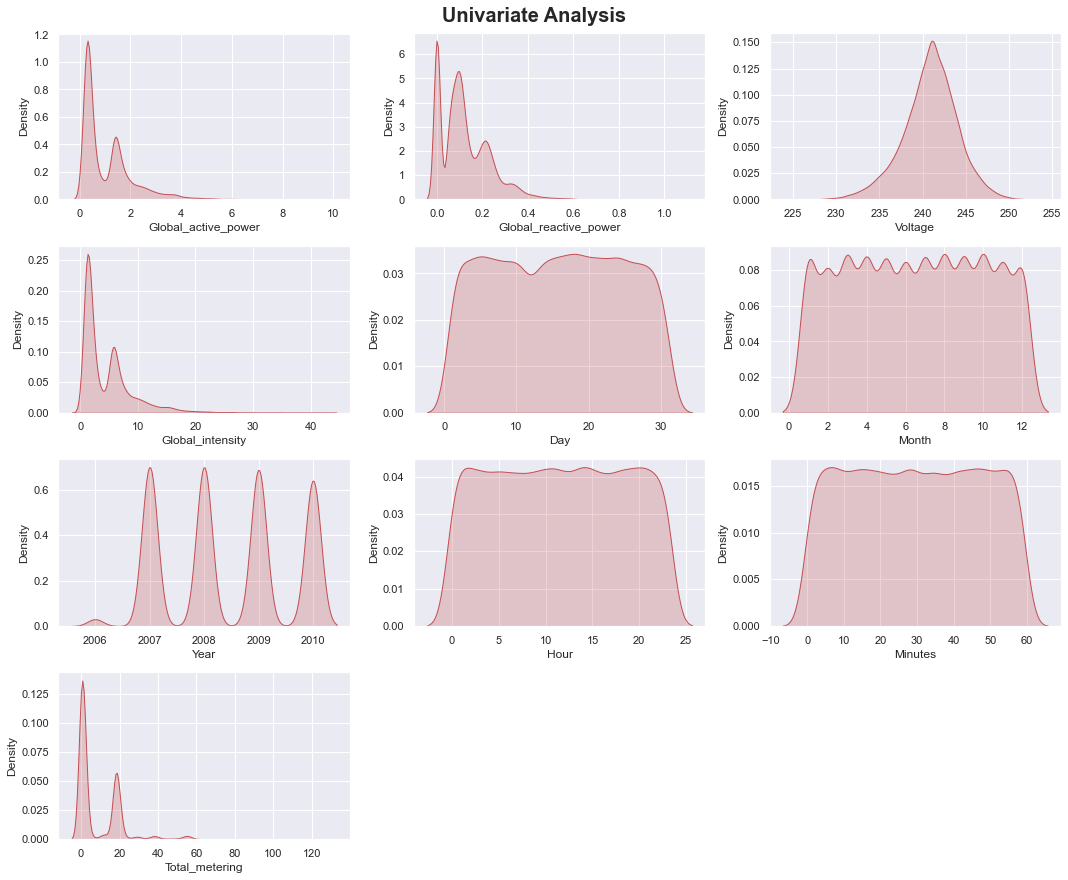

In [28]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis", fontsize=20, fontweight= 'bold')
for i in range(0, len(df_sample.columns)):   
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_sample[df_sample.columns[i]],shade=True, color='r')
    plt.xlabel(df_sample.columns[i])
    plt.tight_layout()


__observation:__    
__Global_active_power__
Power is distributed betweem 0 to 8.
Most of the power distributed between 0 to 2.
Distribution is not normal    
__Global reactive power__
Reactive power is distributed between 0 to 0.8.
most of the power distributed between 0 to 0.2.  
__Voltage__
Voltage is distributed between 230 to 250.
most of the voltage distributed between 230 to 250.
Voltage is distributed normally  
 __Global intensity__
Intensity is distributed between 0 to 20.
Most of the intensity distributrd between 0 to 10.  
__Total metering__
Metering is distributed between 0 to 60
most of the distribution is between 0 to 25.  

#### Relation of Total Metering with other features

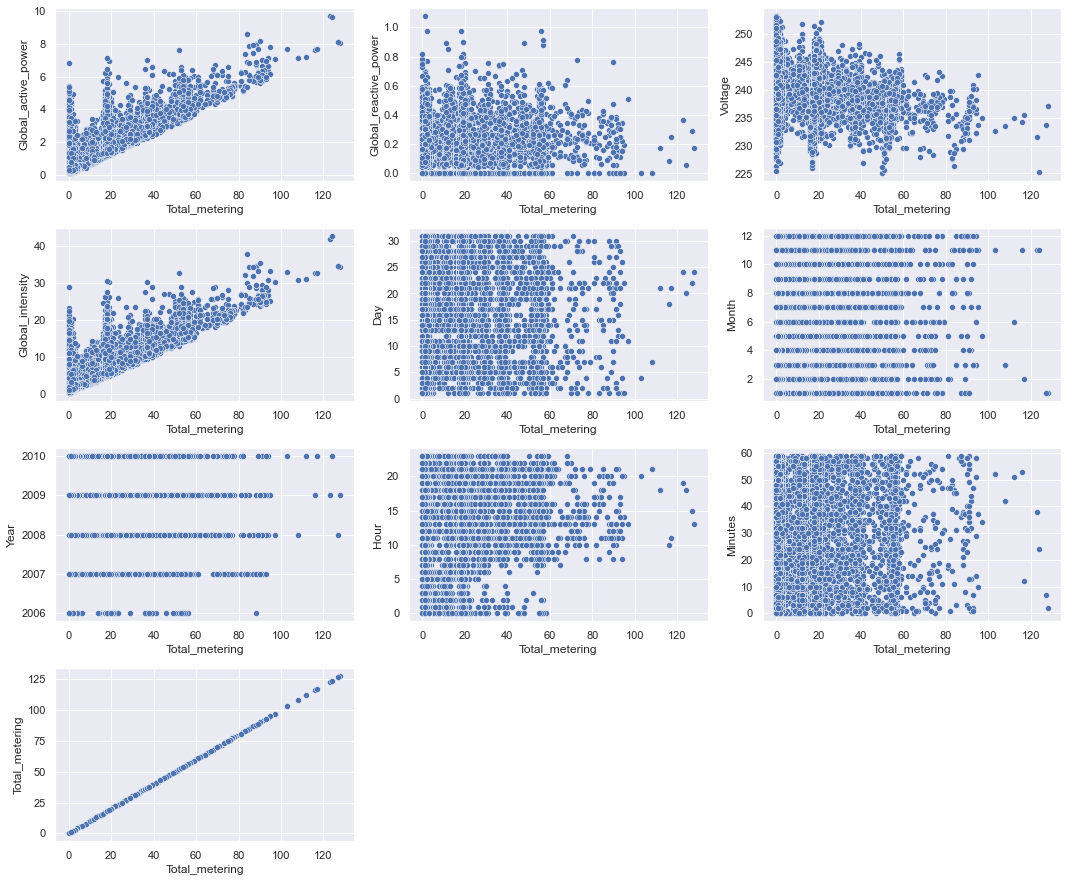

In [29]:
plt.figure(figsize=(15,15))
for i in range(0, len(df_sample.columns)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(x=df_sample['Total_metering'], y=df_sample[df_sample.columns[i]])
    plt.ylabel(df_sample.columns[i])
    plt.xlabel('Total_metering')
    plt.tight_layout()

#### Year wise total metering

<AxesSubplot:title={'center':'Yearly - Total watt-hour for Total Metering'}, xlabel='Year', ylabel='Readings in watt-hour'>

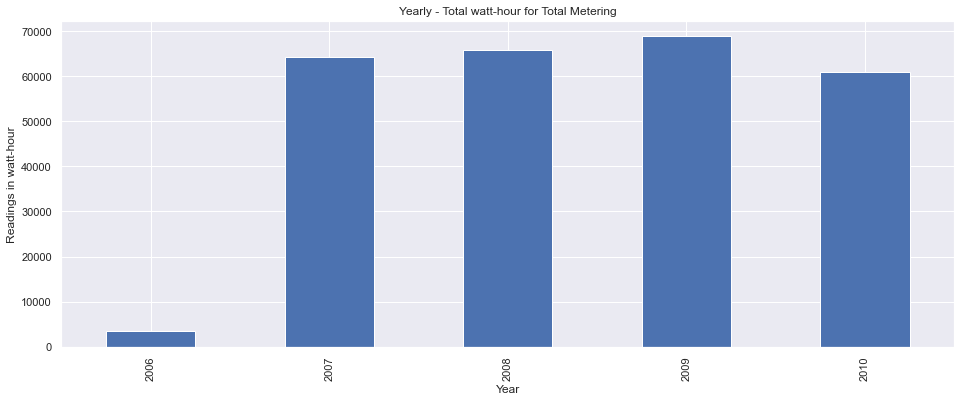

In [30]:
df_sample.groupby(df_sample.Year)['Total_metering'].sum().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Total watt-hour for Total Metering", figsize=(16,6))

__observation:__   
    The total metering was max in the year 2009.  
    The yearly total metering was minimum for year 2006.

### Year wise total power consumption

<AxesSubplot:title={'center':'Yearly - Total watt-hour for Power Consumption'}, xlabel='Year', ylabel='Readings in watt-hour'>

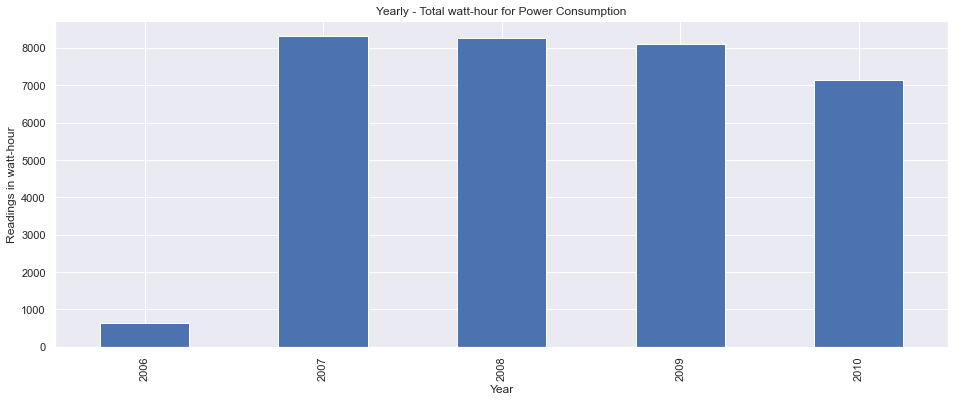

In [31]:
df_sample.groupby(df_sample.Year)['Global_active_power'].sum().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Total watt-hour for Power Consumption", figsize=(16,6))

#### Monthly - Total Voltage 

<AxesSubplot:title={'center':'Monthly - Total watt-hour for Power Consumption'}, xlabel='Month', ylabel='Readings in watt-hour'>

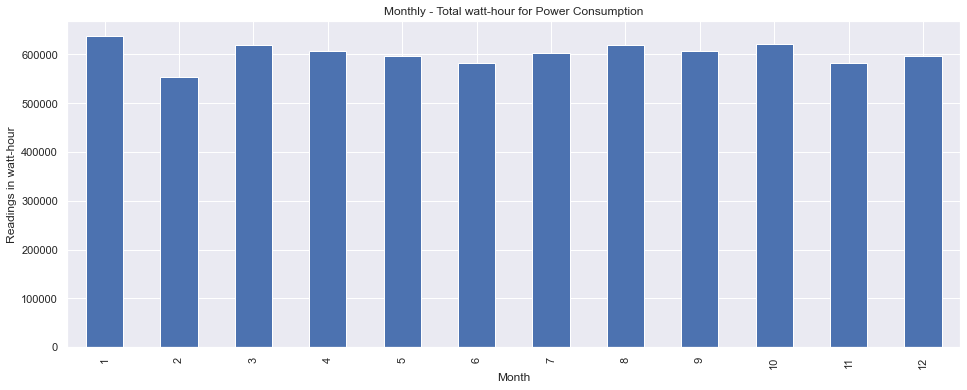

In [32]:
df_sample.groupby(df_sample.Month)['Voltage'].sum().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Total watt-hour for Power Consumption", figsize=(16,6))

__observation:__  
The monthly distribution of voltage is almost same for all the months.

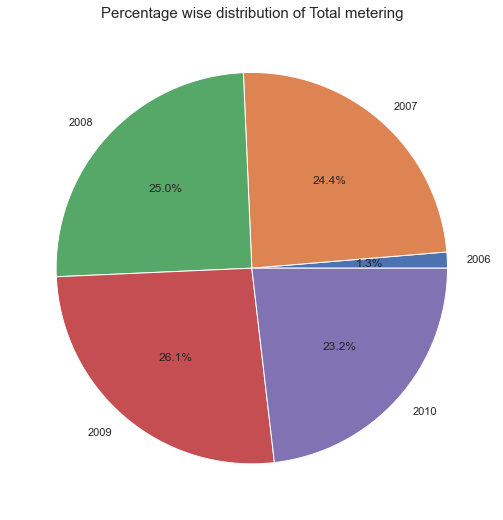

In [33]:
plt.figure(figsize=(9,9))
year_labels = [2006,2007,2008,2009,2010]
plt.pie(x=df_sample.groupby(df_sample['Year'])['Total_metering'].sum(),autopct="%1.1f%%",labels = year_labels)
plt.title("Percentage wise distribution of Total metering",fontsize=15)
plt.show()

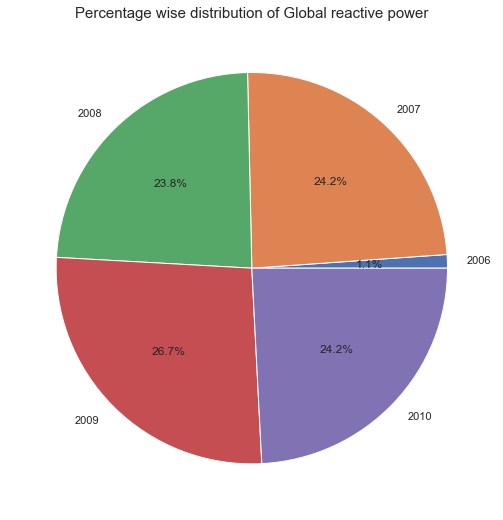

In [34]:
plt.figure(figsize=(9,9))
year_labels = [2006,2007,2008,2009,2010]
plt.pie(x=df_sample.groupby(df_sample['Year'])['Global_reactive_power'].sum(),autopct="%1.1f%%",labels = year_labels)
plt.title("Percentage wise distribution of Global reactive power",fontsize=15)
plt.show()

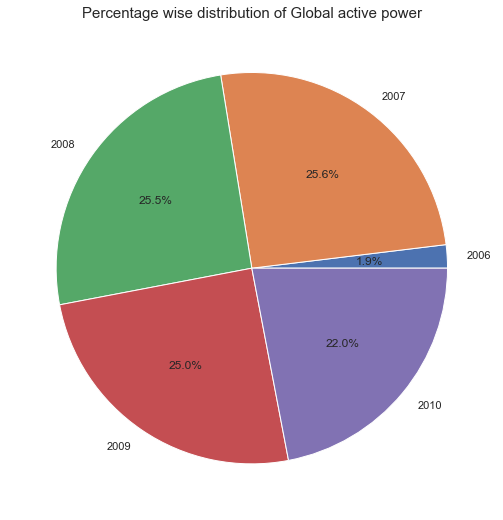

In [35]:
plt.figure(figsize=(9,9))
year_labels = [2006,2007,2008,2009,2010]
plt.pie(x=df_sample.groupby(df_sample['Year'])['Global_active_power'].sum(),autopct="%1.1f%%",labels = year_labels)
plt.title("Percentage wise distribution of Global active power",fontsize=15)
plt.show()

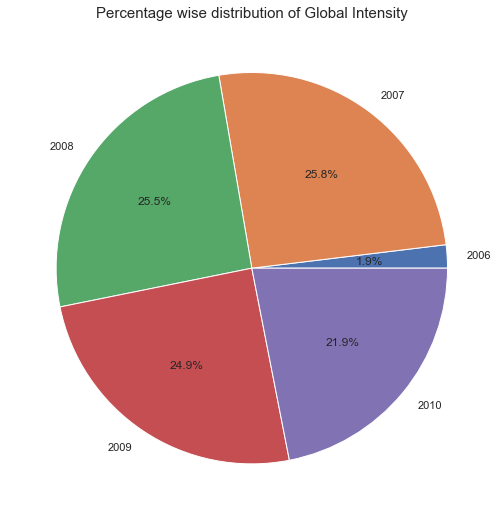

In [36]:
plt.figure(figsize=(9,9))
year_labels = [2006,2007,2008,2009,2010]
plt.pie(x=df_sample.groupby(df_sample['Year'])['Global_intensity'].sum(),autopct="%1.1f%%",labels = year_labels)
plt.title("Percentage wise distribution of Global Intensity",fontsize=15)
plt.show()

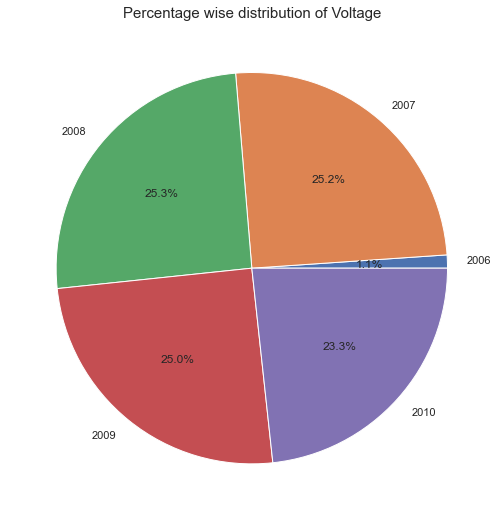

In [37]:
plt.figure(figsize=(9,9))
year_labels = [2006,2007,2008,2009,2010]
plt.pie(x=df_sample.groupby(df_sample['Year'])['Voltage'].sum(),autopct="%1.1f%%",labels = year_labels)
plt.title("Percentage wise distribution of Voltage",fontsize=15)
plt.show()

<AxesSubplot:xlabel='Hour', ylabel='Total_metering'>

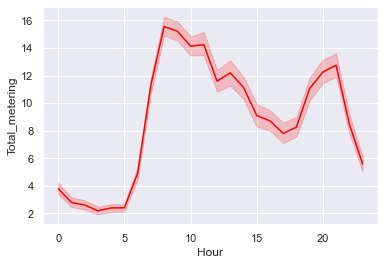

In [38]:
sns.lineplot(x='Hour', y='Total_metering', data=df_sample, color = 'red')

__observation:__  
Total metering id maximum between 5 to 10 hour

<AxesSubplot:xlabel='Month', ylabel='Total_metering'>

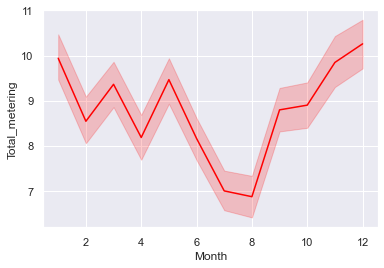

In [39]:
sns.lineplot(x='Month', y='Total_metering', data=df_sample, color = 'red')

__observation:__  
    The max power consumption is in January.  
In july there is least power consumption

#### Pairplot

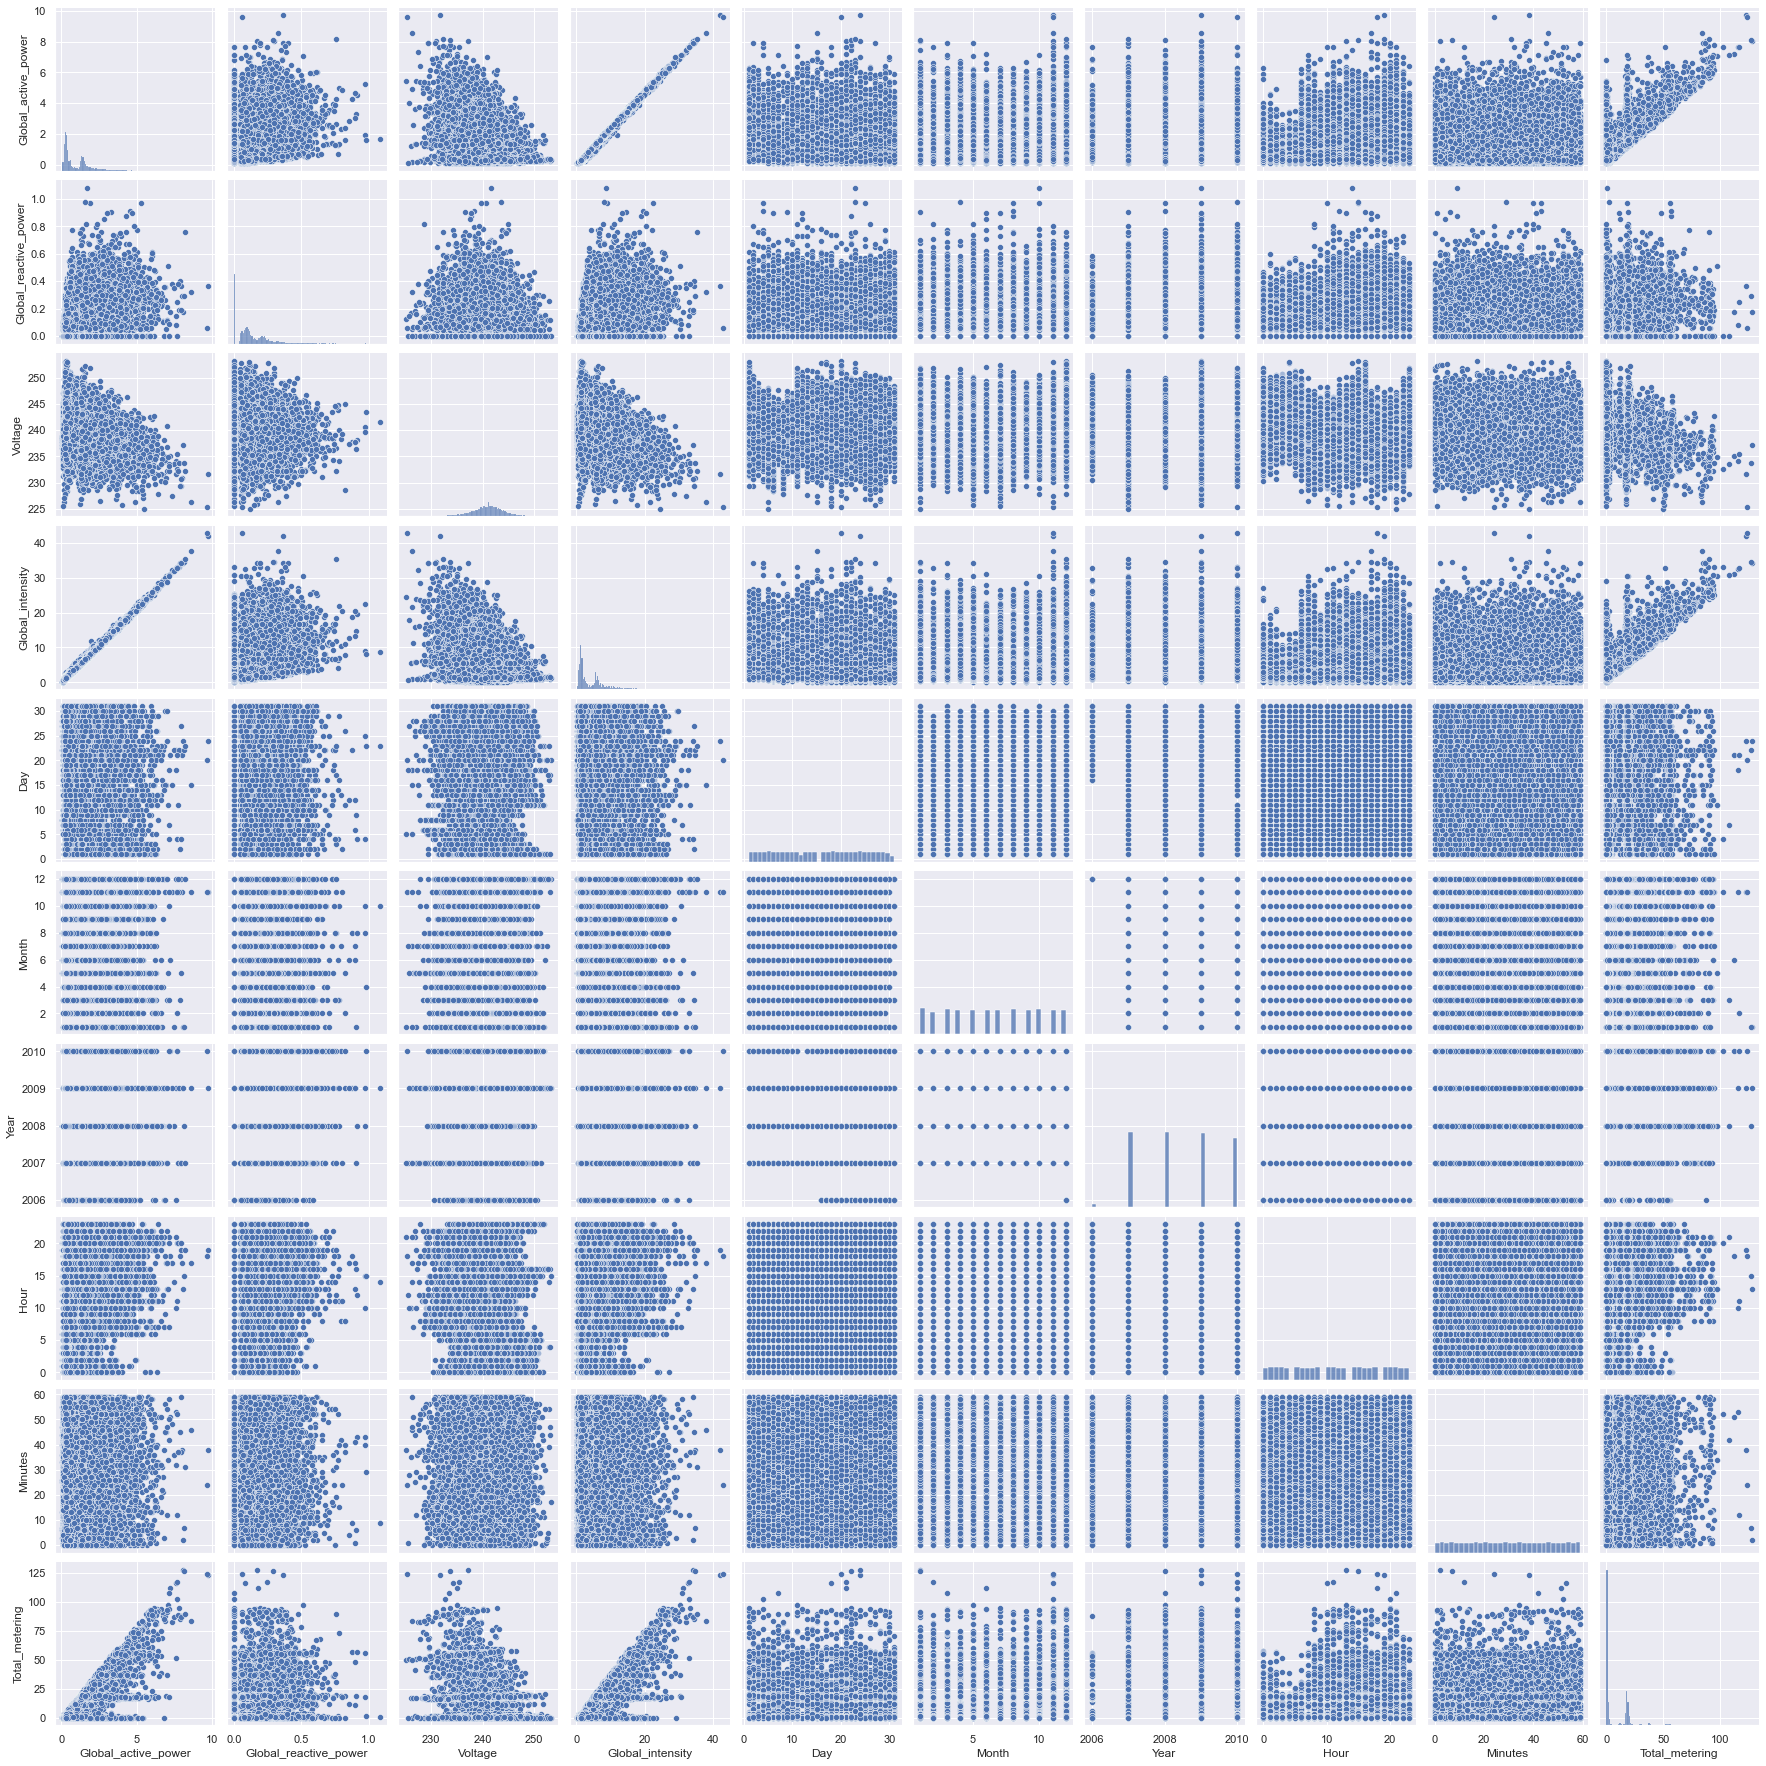

In [40]:
sns.pairplot(df_sample)

### Checking correlation

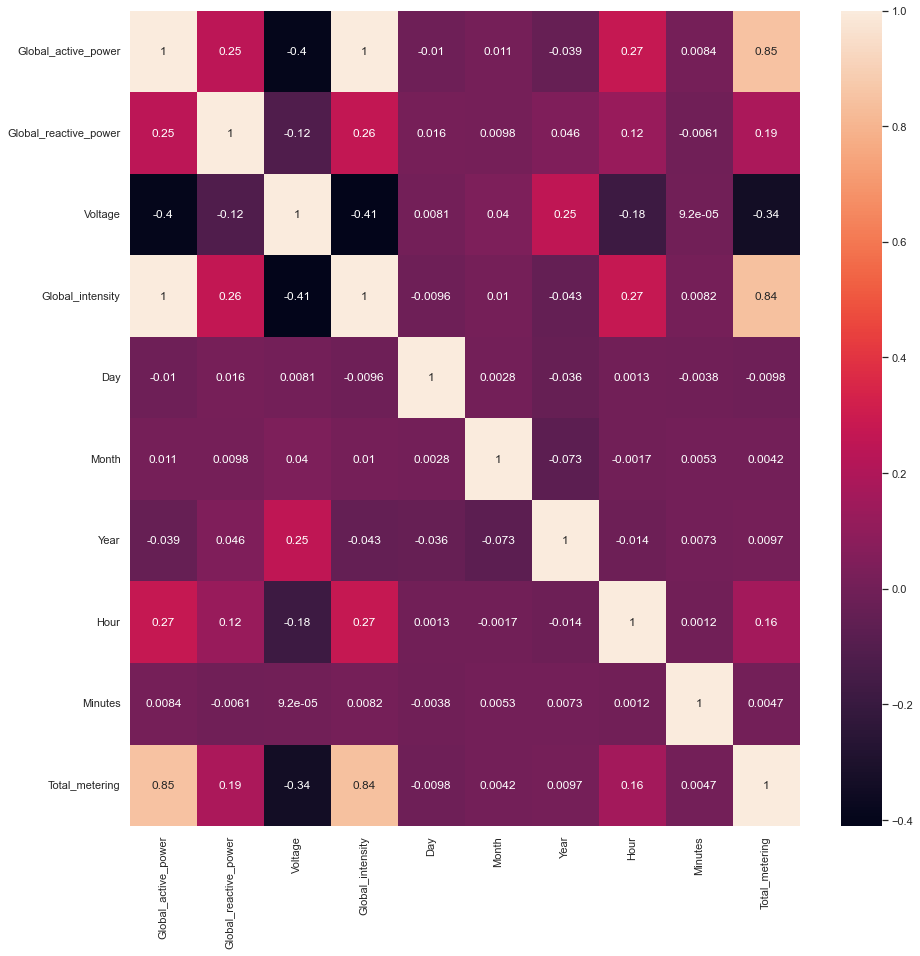

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df_sample.corr(), annot=True);

__observation:__  
Global active power and Global intensity are highly correlated
 
###  Checking for outliers

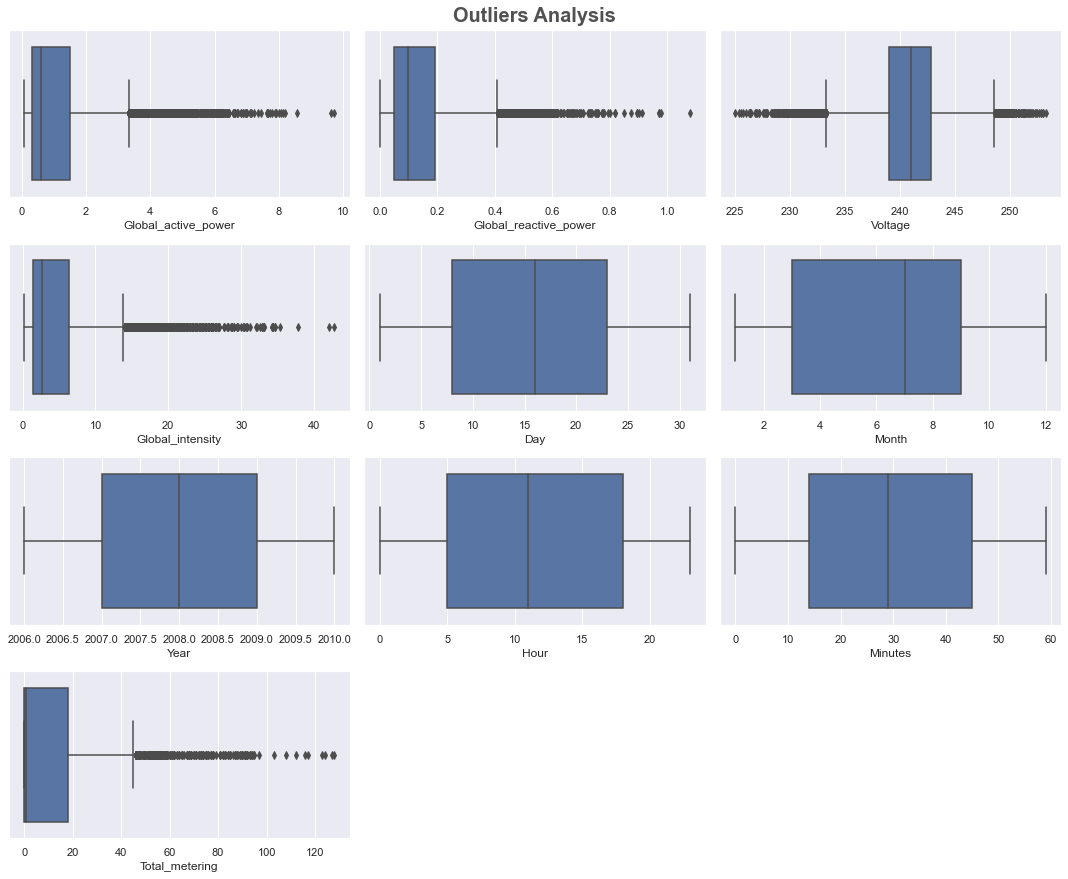

In [42]:
plt.figure(figsize=(15,15))
plt.suptitle("Outliers Analysis",fontsize = 20, fontweight = 'bold', alpha= 0.8)
for i in range(0, len(df_sample.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(df_sample[df_sample.columns[i]])
    plt.tight_layout()

#### Handling Outliers

In [ ]:
'''
from feature_engine.outliers.winsorizer import Winsorizer
for item in df_sample.columns:
    winsorizer = Winsorizer(capping_method = 'iqr',tail = 'both', fold = 1.5, variables = [str(item)])
    # capping_methods = 'iqr' - 25th quantile & 75th quantile
    df_sample[str(item)] = winsorizer.fit_transform(df_sample[[str(item)]])
    '''

In [ ]:
'''
plt.figure(figsize=(15,15))
plt.suptitle("Boxplot after handling Outliers",fontsize = 20, fontweight = 'bold', alpha= 0.8)
for i in range(0, len(df_sample.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(df_sample[df_sample.columns[i]])
    plt.tight_layout()
'''


### Saving this Cleaned data

In [44]:
df_sample.to_csv("cleaned_power_consumption_data.csv")

In [45]:
df_new = pd.DataFrame()

In [46]:
df_new = df_sample

In [47]:
df_new.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,Minutes,Total_metering
0,2.326,0.092,242.42,9.6,1,7,2009,18,34,0.0
1,2.520,0.432,239.30,10.6,27,11,2009,11,16,18.0
2,1.026,0.062,238.71,4.2,28,12,2009,22,2,2.0
3,0.332,0.246,239.83,1.6,16,7,2008,1,48,1.0
4,0.158,0.000,242.75,0.6,14,8,2010,13,30,1.0


In [48]:
df_new.shape

(30000, 10)

# 6. Preprocessing

#### Input and Output variables

In [49]:
X = df_new.drop(['Total_metering','Day','Month','Year','Hour','Minutes'], axis=1)         #input variable
y = df_new.Total_metering         #output variable

In [50]:
X.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,2.326,0.092,242.42,9.6
1,2.520,0.432,239.30,10.6
2,1.026,0.062,238.71,4.2
3,0.332,0.246,239.83,1.6
4,0.158,0.000,242.75,0.6


In [51]:
y

0         0.0
1        18.0
2         2.0
3         1.0
4         1.0
         ... 
29995     2.0
29996     0.0
29997    38.0
29998    19.0
29999     1.0
Name: Total_metering, Length: 30000, dtype: float64

### Splitting train and test data

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=36)
X_train.shape, X_test.shape

((20100, 4), (9900, 4))

In [53]:
X_train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
16094,3.802,0.200,237.96,16.0
12459,1.992,0.110,242.06,8.2
1232,1.076,0.180,243.71,4.4
12089,0.304,0.238,242.96,1.6
1463,1.228,0.170,226.01,5.4


In [54]:
X_test.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
17237,0.436,0.160,244.43,1.8
10971,0.934,0.244,239.62,4.0
8579,1.226,0.000,241.17,5.0
792,0.410,0.210,245.05,1.8
17953,2.088,0.452,239.30,8.8


In [55]:
y_train

16094    19.0
12459    19.0
1232      2.0
12089     1.0
1463     17.0
         ... 
7329      0.0
19368     1.0
25502     0.0
610       0.0
29317     1.0
Name: Total_metering, Length: 20100, dtype: float64

In [56]:
y_test

17237     1.0
10971    12.0
8579     18.0
792       1.0
17953    20.0
         ... 
8615      2.0
20415     0.0
8379      0.0
13553     1.0
10119     0.0
Name: Total_metering, Length: 9900, dtype: float64

### Feaure Scaling
Standardization

In [57]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [58]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [59]:
X_train_scaled

array([[ 2.61981246e+00,  6.99024054e-01, -8.91036613e-01,
         2.61563021e+00],
       [ 8.81688307e-01, -1.07295298e-01,  3.79330646e-01,
         8.33312527e-01],
       [ 2.06304602e-03,  5.19841975e-01,  8.90576007e-01,
        -3.49960885e-02],
       ...,
       [-9.15973799e-01, -1.09279673e+00, -2.49913566e+00,
        -9.03304704e-01],
       [-8.33388894e-01, -1.96886337e-01, -8.78642786e-01,
        -8.11903797e-01],
       [-6.60536769e-01,  1.91746219e+00, -9.59202661e-01,
        -5.83401530e-01]])

In [60]:
X_test_scaled

array([[-0.61252229,  0.3406599 ,  1.11366489, -0.62910198],
       [-0.13429808,  1.09322463, -0.3766928 , -0.126397  ],
       [ 0.14610648, -1.09279673,  0.103568  ,  0.10210527],
       ...,
       [ 0.48796958, -1.09279673,  1.08887724,  0.42200845],
       [-0.73351878, -0.55525049,  1.15084637, -0.76620334],
       [-0.93325901, -1.09279673, -1.44875882, -0.94900516]])

#### Variance Inflation Factor

In [61]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_train_scaled,i) for i in range(X_train_scaled.shape[1])]
vif["Features"] = X_train.columns
#let's check the values
vif

,vif,Features
0,597.414742,Global_active_power
1,1.323943,Global_reactive_power
2,1.309165,Voltage
3,610.456137,Global_intensity


# 7. Model

## Linear Regression

In [62]:
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error

lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)

# Prediction  
lreg_pred = lreg.predict(X_test_scaled)

# Performance Metrics
mae = mean_absolute_error(y_test, lreg_pred)
r2 = r2_score(y_test, lreg_pred)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
mse = mean_squared_error(y_test, lreg_pred)
rmse = np.sqrt(mse)
accuracy=lreg.score(X_train_scaled,y_train)

print("Linear Regression")
print("Accuracy : {:.5f}".format(accuracy) )
print("The regression Coefficient are : " , lreg.coef_)
print("The Intercept  is : " , lreg.intercept_)
print ("MAE value: {:.4f}".format(mae))
print ("MSE value: {:.4f}".format(mse))
print(" RMSE value : {:.4f} ".format(rmse))
print ("R2 Score value: {:.4f}".format(r2))
print ("Adjusted R2 Score value: {:.4f}".format(adjusted_r2))

Linear Regression
Accuracy : 0.71525
The regression Coefficient are :  [ 26.13072666   0.06494579  -0.31503408 -15.5404281 ]
The Intercept  is :  8.696517412935322
MAE value: 4.2820
MSE value: 46.6297
 RMSE value : 6.8286 
R2 Score value: 0.7293
Adjusted R2 Score value: 0.7292


#### Validating Assumptions

Text(0, 0.5, 'Test Predicted Data')

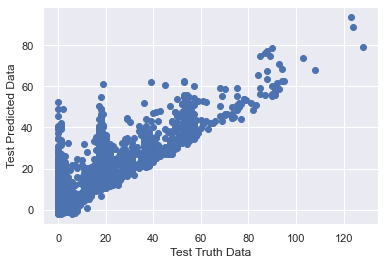

In [63]:
# 1. linearity
plt.scatter(y_test,lreg_pred) 
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [64]:
# 2. residuals
residuals=y_test- lreg_pred
residuals

17237    -1.138661
10971     4.658854
8579      7.175974
792      -0.454815
17953     0.594106
           ...    
8615      0.947944
20415    -7.670896
8379    -14.475319
13553    -0.037650
10119     0.556836
Name: Total_metering, Length: 9900, dtype: float64

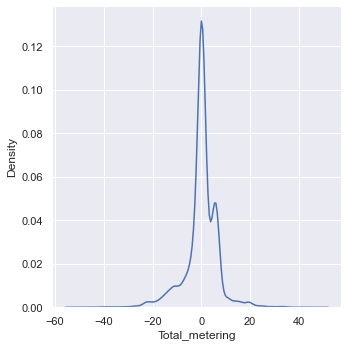

In [65]:
sns.displot(residuals,kind="kde")

<AxesSubplot:xlabel='predicted values', ylabel='Residuals'>

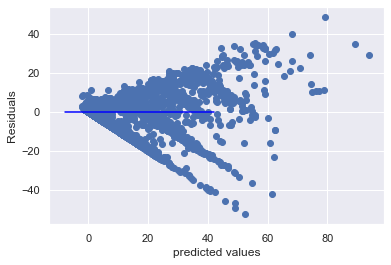

In [66]:
# 3. homoscedasticity
plt.scatter(lreg_pred,residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
sns.lineplot([-8,42],[0,0],color='blue')

## Ridge Regression Model

In [67]:
# Fitting Data into model
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

# Predicting Test Data
ridge_pred = ridge.predict(X_test_scaled)

# Performance Metrics
mae = mean_absolute_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
accuracy=ridge.score(X_train_scaled,y_train)
mse = mean_squared_error(y_test, ridge_pred)
rmse = np.sqrt(mse)

print("Ridge Regression")
print("Accuracy : {:.5f}".format(accuracy) )
print("The regression Coefficient are : " , lreg.coef_)
print("The Intercept  is : " , lreg.intercept_)
print ("MAE value: {:.4f}".format(mae))
print ("MSE value: {:.4f}".format(mse))
print(" RMSE value : {:.4f} ".format(rmse))
print ("R2 Score value: {:.4f}".format(r2))
print ("Adjusted R2 Score value: {:.4f}".format(adjusted_r2))

Ridge Regression
Accuracy : 0.71524
The regression Coefficient are :  [ 26.13072666   0.06494579  -0.31503408 -15.5404281 ]
The Intercept  is :  8.696517412935322
MAE value: 4.2825
MSE value: 46.6199
 RMSE value : 6.8279 
R2 Score value: 0.7294
Adjusted R2 Score value: 0.7293


#### Validating Assumptions

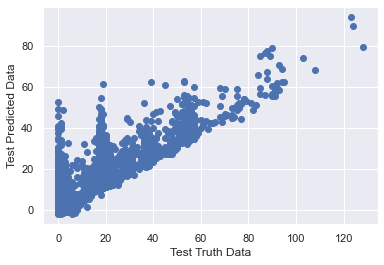

In [68]:
## 1. linearity
plt.scatter(y_test,ridge_pred) 
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")
sns.set(rc={'figure.figsize':(10,8)})

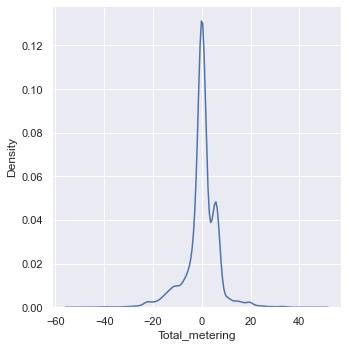

In [69]:
#2.residuals
residuals=y_test- ridge_pred
sns.displot(residuals,kind="kde")

<AxesSubplot:xlabel='predicted values', ylabel='Residuals'>

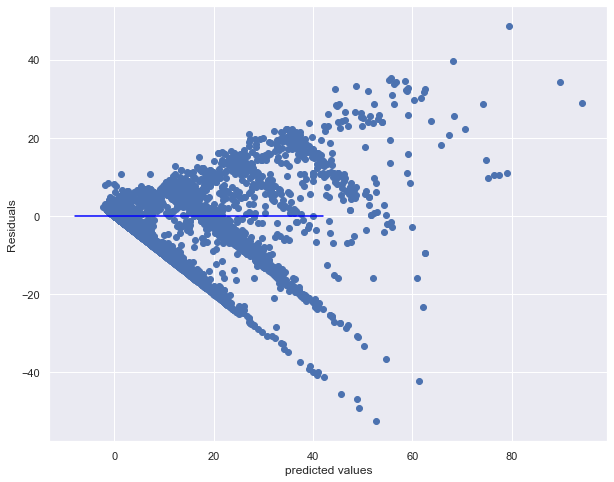

In [70]:
# 3. homoscedesacity
plt.scatter(ridge_pred,residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
sns.lineplot([-8,42],[0,0],color='blue')

## Lasso Regression Model

In [71]:
lasso = Lasso()

#Fitting Data into model 

lasso.fit(X_train_scaled, y_train)

# Predicting Test Data
lasso_pred = lasso.predict(X_test_scaled)

#Performance Metrics
mae = mean_absolute_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
accuracy=lasso.score(X_train_scaled,y_train)

print("Lasso Regression")
print("Accuracy : {:.5f}".format(accuracy) )
print("The regression Coefficient are : " , lreg.coef_)
print("The Intercept  is : " , lreg.intercept_)
print ("MAE value: {:.4f}".format(mae))
print ("MSE value: {:.4f}".format(mse))
print(" RMSE value : {:.4f} ".format(rmse))
print ("R2 Score value: {:.4f}".format(r2))
print ("Adjusted R2 Score value: {:.4f}".format(adjusted_r2))

Lasso Regression
Accuracy : 0.70622
The regression Coefficient are :  [ 26.13072666   0.06494579  -0.31503408 -15.5404281 ]
The Intercept  is :  8.696517412935322
MAE value: 4.4992
MSE value: 48.5543
 RMSE value : 6.9681 
R2 Score value: 0.7182
Adjusted R2 Score value: 0.7181


#### Checking Assumptions for Lasso model

Text(0, 0.5, 'Test Predicted Data')

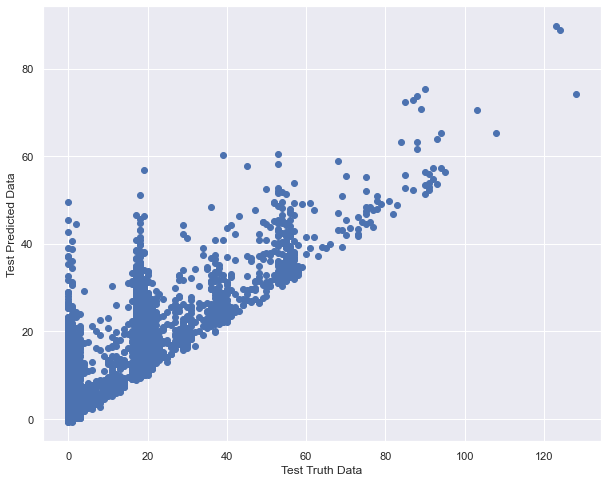

In [72]:
# 1 .linearity 
plt.scatter(y_test,lasso_pred) 
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [73]:
# 2. residuals
residuals=y_test- lasso_pred
residuals

17237    -1.725067
10971     4.612748
8579      7.879097
792      -1.481659
17953     1.809211
           ...    
8615     -0.987198
20415    -7.387252
8379    -13.453710
13553    -0.545478
10119     0.401780
Name: Total_metering, Length: 9900, dtype: float64

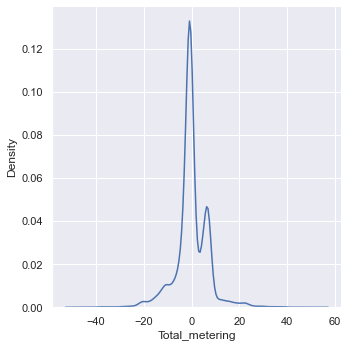

In [74]:
sns.displot(residuals,kind="kde")

<AxesSubplot:xlabel='predicted values', ylabel='Residuals'>

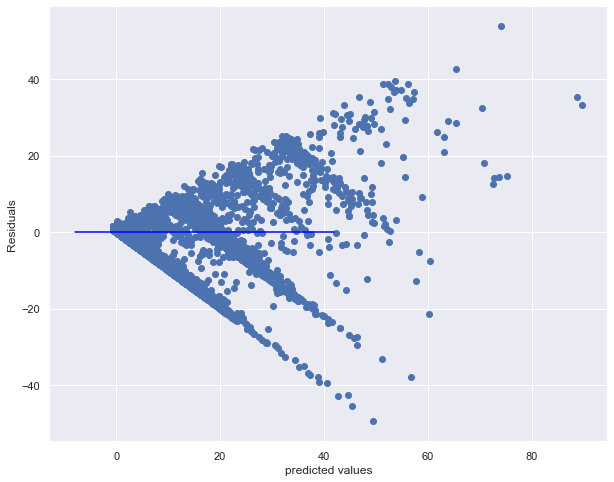

In [75]:
# 3. Homoscedasticity
plt.scatter(lasso_pred,residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
sns.lineplot([-8,42],[0,0],color='blue')

## ElasticNet Regression Model

In [76]:
elsc = ElasticNet()

# Fitting Data into Model
elsc.fit(X_train_scaled, y_train)

# Predicting Test data

elsc_pred = elsc.predict(X_test_scaled)

# Performance metrics

mae = mean_absolute_error(y_test, elsc_pred)
r2 = r2_score(y_test, elsc_pred)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
mse = mean_squared_error(y_test, elsc_pred)
rmse = np.sqrt(mse)
accuracy=elsc.score(X_train_scaled,y_train)

print("Elastic Net Regression")
print("Accuracy : {:.5f}".format(accuracy) )
print("The regression Coefficient are : " , lreg.coef_)
print("The Intercept  is : " , lreg.intercept_)
print ("MAE value: {:.4f}".format(mae))
print ("MSE value: {:.4f}".format(mse))
print(" RMSE value : {:.4f} ".format(rmse))
print ("R2 Score value: {:.4f}".format(r2))
print ("Adjusted R2 Score value: {:.4f}".format(adjusted_r2))

Elastic Net Regression
Accuracy : 0.67036
The regression Coefficient are :  [ 26.13072666   0.06494579  -0.31503408 -15.5404281 ]
The Intercept  is :  8.696517412935322
MAE value: 5.1143
MSE value: 55.4938
 RMSE value : 7.4494 
R2 Score value: 0.6779
Adjusted R2 Score value: 0.6778


#### Checking Assumptions:

Text(0, 0.5, 'Test Predicted Data')

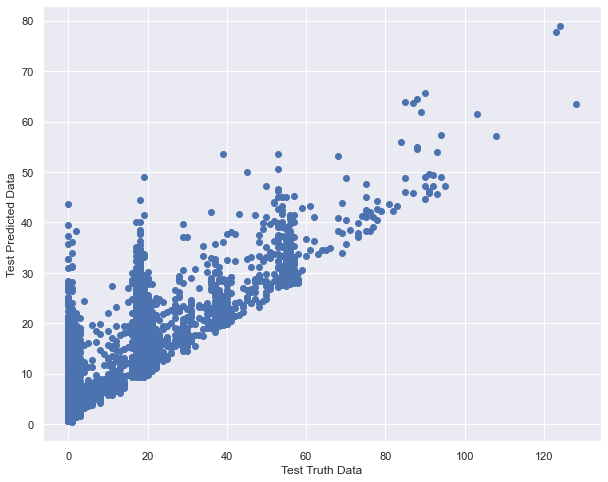

In [77]:
# Linarity
plt.scatter(y_test,elsc_pred) 
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [78]:
# residual distribution
residuals=y_test- elsc_pred
residuals

17237    -2.248133
10971     4.202574
8579      8.343238
792      -2.069197
17953     3.280054
           ...    
8615     -2.178879
20415    -7.213178
8379    -11.927475
13553    -1.194256
10119    -1.697391
Name: Total_metering, Length: 9900, dtype: float64

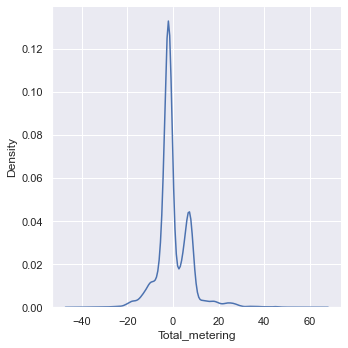

In [79]:
sns.displot(residuals,kind="kde")

<AxesSubplot:xlabel='predicted values', ylabel='Residuals'>

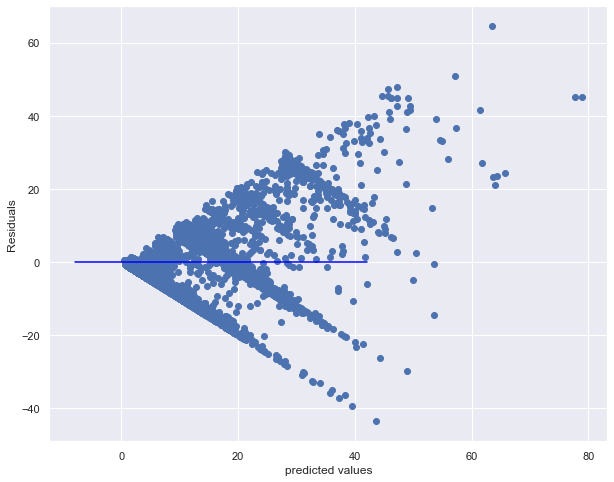

In [80]:
# homoscedestacity
plt.scatter(elsc_pred,residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
sns.lineplot([-8,42],[0,0],color='blue')

## SVR Model

In [81]:
from sklearn.svm import SVR

In [82]:
svr = SVR(kernel='linear')

# Fitting Data into Model
svr.fit(X_train_scaled, y_train)

# Predicting Test data

svr_pred = svr.predict(X_test_scaled)

# Performance metrics

mae = mean_absolute_error(y_test, svr_pred)
r2 = r2_score(y_test, svr_pred)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
mse = mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
accuracy=svr.score(X_train_scaled,y_train)

print("SVR ")
print("Accuracy : {:.5f}".format(accuracy) )
print("The regression Coefficient are : " , lreg.coef_)
print("The Intercept  is : " , lreg.intercept_)
print ("MAE value: {:.4f}".format(mae))
print ("MSE value: {:.4f}".format(mse))
print(" RMSE value : {:.4f} ".format(rmse))
print ("R2 Score value: {:.4f}".format(r2))
print ("Adjusted R2 Score value: {:.4f}".format(adjusted_r2))

SVR 
Accuracy : 0.70211
The regression Coefficient are :  [ 26.13072666   0.06494579  -0.31503408 -15.5404281 ]
The Intercept  is :  8.696517412935322
MAE value: 4.2258
MSE value: 48.1294
 RMSE value : 6.9375 
R2 Score value: 0.7206
Adjusted R2 Score value: 0.7205


## Decision Tree Regressor

In [83]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [84]:
y_pred_dt = dt_model.predict(X_test_scaled)

##### Accuracy

In [85]:
dt_model.score(X_train_scaled,y_train)

0.9999961144535832

In [86]:
# Performance metrics

mae = mean_absolute_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
accuracy=dt_model.score(X_train_scaled,y_train)

print("Dt Regression")
print("Accuracy : {:.5f}".format(accuracy) )
print ("MAE value: {:.4f}".format(mae))
print ("MSE value: {:.4f}".format(mse))
print(" RMSE value : {:.4f} ".format(rmse))
print ("R2 Score value: {:.4f}".format(r2))
print ("Adjusted R2 Score value: {:.4f}".format(adjusted_r2))

Dt Regression
Accuracy : 1.00000
MAE value: 3.9845
MSE value: 79.8446
 RMSE value : 8.9356 
R2 Score value: 0.5366
Adjusted R2 Score value: 0.5364


## HyperParameter tuning the DT Regressor Model

In [89]:
param = {'splitter' : ['best', 'random'],
'criterion' : ['squared_error', 'absolute_error'],
'max_depth': [1,2,3,4,5,6,7,8,9,11,10],
'min_samples_split': [0.5,1.5,2.5,1,2,3,4,5,6,7,9],
'min_samples_leaf': [0.5,1,1.25,1.5,1.75,2,2.5,3,4,5]
}

In [90]:
grid_dt= GridSearchCV(estimator=dt_model, param_grid=param, cv=3)
grid_dt.fit(X_train_scaled,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 10],
                         'min_samples_leaf': [0.5, 1, 1.25, 1.5, 1.75, 2, 2.5,
                                              3, 4, 5],
                         'min_samples_split': [0.5, 1.5, 2.5, 1, 2, 3, 4, 5, 6,
                                               7, 9],
                         'splitter': ['best', 'random']})

In [91]:
grid_dt.best_params_

{'criterion': 'squared_error',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'splitter': 'random'}

##### Making model with best parameters

In [92]:
dt_model_hyper = DecisionTreeRegressor(criterion='squared_error',max_depth= 7,min_samples_leaf= 1,min_samples_split= 9,splitter= 'random')

In [93]:
dt_model_hyper.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=7, min_samples_split=9, splitter='random')

In [94]:
y_pred_dt_hyper = dt_model_hyper.predict(X_test_scaled)

In [95]:
# Performance metrics

mae = mean_absolute_error(y_test, y_pred_dt_hyper)
r2 = r2_score(y_test, y_pred_dt_hyper)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
mse = mean_squared_error(y_test, y_pred_dt_hyper)
rmse = np.sqrt(mse)
accuracy=dt_model_hyper.score(X_train_scaled,y_train)

print("Dt Regression")
print("Accuracy : {:.5f}".format(accuracy) )
print ("MAE value: {:.4f}".format(mae))
print ("MSE value: {:.4f}".format(mse))
print(" RMSE value : {:.4f} ".format(rmse))
print ("R2 Score value: {:.4f}".format(r2))
print ("Adjusted R2 Score value: {:.4f}".format(adjusted_r2))

Dt Regression
Accuracy : 0.75874
MAE value: 3.2421
MSE value: 38.1883
 RMSE value : 6.1797 
R2 Score value: 0.7624
Adjusted R2 Score value: 0.7623


[Text(0.5005859375, 0.9375, 'X[0] <= -0.661\nsquared_error = 158.146\nsamples = 20100\nvalue = 8.674'),
 Text(0.230078125, 0.8125, 'X[1] <= -0.315\nsquared_error = 0.599\nsamples = 7565\nvalue = 0.65'),
 Text(0.13359375, 0.6875, 'X[3] <= -0.696\nsquared_error = 0.357\nsamples = 3960\nvalue = 0.426'),
 Text(0.0734375, 0.5625, 'X[1] <= -0.909\nsquared_error = 0.334\nsamples = 3713\nvalue = 0.42'),
 Text(0.028125, 0.4375, 'X[2] <= -1.795\nsquared_error = 0.261\nsamples = 2438\nvalue = 0.385'),
 Text(0.0125, 0.3125, 'X[0] <= -0.811\nsquared_error = 0.026\nsamples = 37\nvalue = 0.027'),
 Text(0.00625, 0.1875, 'squared_error = 0.0\nsamples = 33\nvalue = 0.0'),
 Text(0.01875, 0.1875, 'squared_error = 0.188\nsamples = 4\nvalue = 0.25'),
 Text(0.04375, 0.3125, 'X[0] <= -0.818\nsquared_error = 0.263\nsamples = 2401\nvalue = 0.391'),
 Text(0.03125, 0.1875, 'X[3] <= -0.978\nsquared_error = 0.246\nsamples = 1335\nvalue = 0.348'),
 Text(0.025, 0.0625, 'squared_error = 0.228\nsamples = 102\nvalue = 0

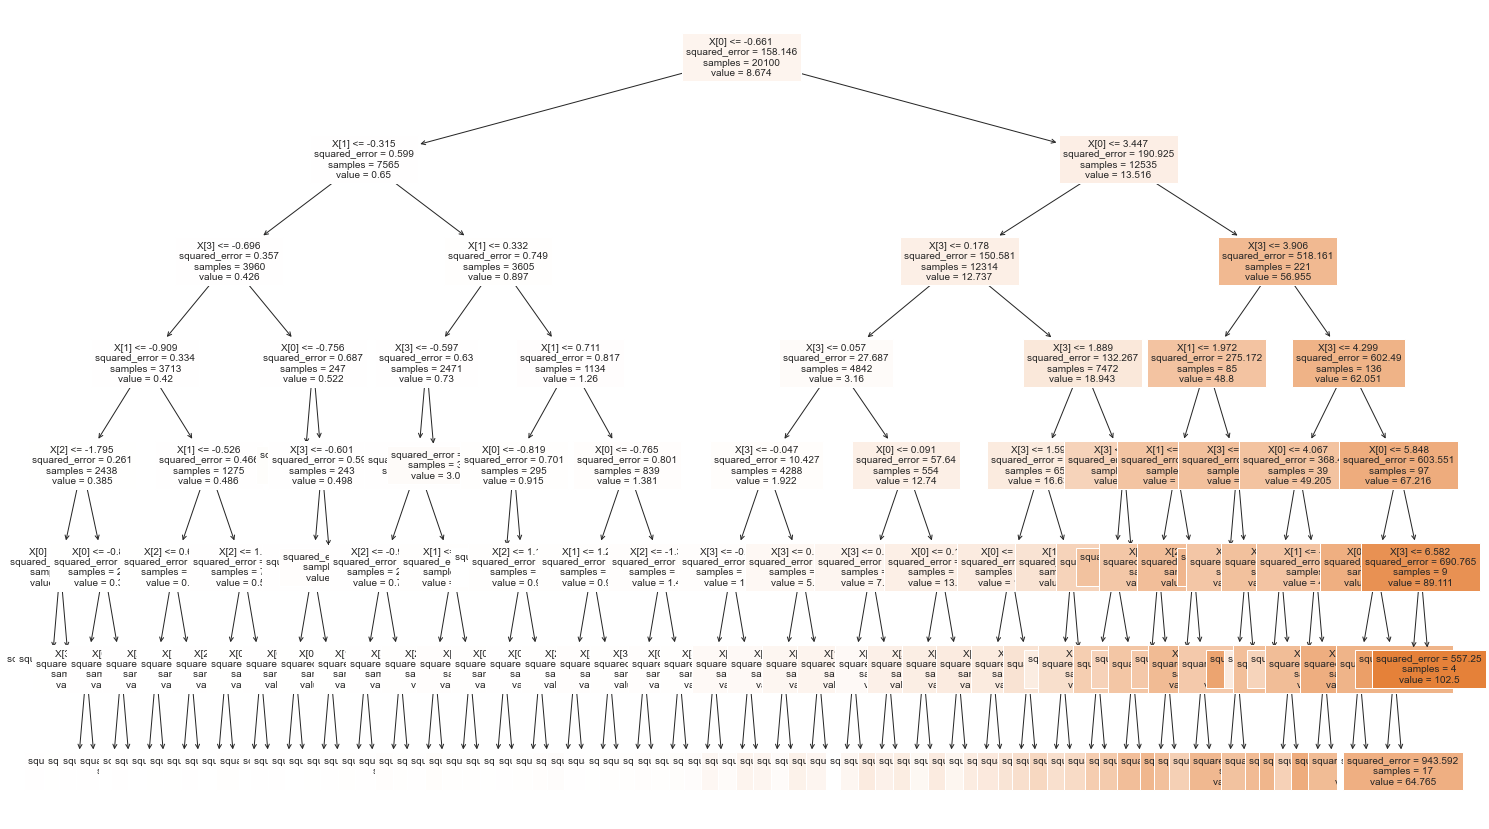

In [99]:
from sklearn import tree
fig = plt.figure(figsize=(25,15))
tree.plot_tree(dt_model_hyper,filled = True, fontsize =10)

In [100]:
fig.savefig("descision Tree hypertuned")

## Random Forest Regressor Model

In [87]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor()

In [88]:
RF_model.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [89]:
# Prediction: 
y_pred_rf = RF_model.predict(X_test_scaled)

In [90]:
# Performance metrics

mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
accuracy=RF_model.score(X_train_scaled,y_train)

print("Random Forest Regressor")
print("Accuracy : {:.5f}".format(accuracy) )
print ("MAE value: {:.4f}".format(mae))
print ("MSE value: {:.4f}".format(mse))
print(" RMSE value : {:.4f} ".format(rmse))
print ("R2 Score value: {:.4f}".format(r2))
print ("Adjusted R2 Score value: {:.4f}".format(adjusted_r2))

Random Forest Regressor
Accuracy : 0.96449
MAE value: 3.2853
MSE value: 42.7538
 RMSE value : 6.5386 
R2 Score value: 0.7518
Adjusted R2 Score value: 0.7517






## Bagging Regressor Model

In [91]:
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_classification

bagging_model_dt = BaggingRegressor(base_estimator =DecisionTreeRegressor(),n_estimators = 30,random_state = 0).fit(X_train_scaled,y_train)

In [92]:
y_pred_bagging = bagging_model_dt.predict(X_test_scaled)

In [93]:
# Performance metrics

mae = mean_absolute_error(y_test, y_pred_bagging)
r2 = r2_score(y_test, y_pred_bagging)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
mse = mean_squared_error(y_test, y_pred_bagging)
rmse = np.sqrt(mse)
accuracy=bagging_model_dt.score(X_train_scaled,y_train)

print("Bagging Regressor")
print("Accuracy : {:.5f}".format(accuracy) )
print ("MAE value: {:.4f}".format(mae))
print ("MSE value: {:.4f}".format(mse))
print(" RMSE value : {:.4f} ".format(rmse))
print ("R2 Score value: {:.4f}".format(r2))
print ("Adjusted R2 Score value: {:.4f}".format(adjusted_r2))

Bagging Regressor
Accuracy : 0.96235
MAE value: 3.2768
MSE value: 43.2753
 RMSE value : 6.5784 
R2 Score value: 0.7488
Adjusted R2 Score value: 0.7487


## Extra Tree regressor

In [94]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)

In [95]:
y_pred_etr = etr_model.predict(X_test_scaled)

In [97]:
# Performance metrics

mae = mean_absolute_error(y_test, y_pred_etr)
r2 = r2_score(y_test, y_pred_etr)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
mse = mean_squared_error(y_test, y_pred_etr)
rmse = np.sqrt(mse)
accuracy=etr_model.score(X_train_scaled,y_train)

print("Extra Tree Regressor")
print("Accuracy : {:.5f}".format(accuracy) )
print ("MAE value: {:.4f}".format(mae))
print ("MSE value: {:.4f}".format(mse))
print(" RMSE value : {:.4f} ".format(rmse))
print ("R2 Score value: {:.4f}".format(r2))
print ("Adjusted R2 Score value: {:.4f}".format(adjusted_r2))

Extra Tree Regressor
Accuracy : 1.00000
MAE value: 3.2812
MSE value: 43.8472
 RMSE value : 6.6217 
R2 Score value: 0.7455
Adjusted R2 Score value: 0.7454


## Voting Regressor

In [101]:
from sklearn.ensemble import VotingRegressor
lin_1 = LinearRegression()
svr_2 = SVR()
dt_3 = DecisionTreeRegressor()
rf_4 = RandomForestRegressor(n_estimators=50, random_state=0)
et_5 =ExtraTreesRegressor(n_estimators=50, random_state=0)
lasso_6=Lasso()
ridge_7=Ridge()
elastic_8=ElasticNet()
bag_9=BaggingRegressor()

In [102]:
voting_model = VotingRegressor(estimators=[('lI',lin_1 ),('svr' , svr_2),('dt',dt_3), ('rf',rf_4 ),('etR',et_5),('lasso',lasso_6),('ridge',ridge_7),('elasticNet',elastic_8),('bag',bag_9)], verbose = 2 ,n_jobs=-1)

In [103]:
voting_model.fit(X_train_scaled,y_train)

VotingRegressor(estimators=[('lI', LinearRegression()), ('svr', SVR()),
                            ('dt', DecisionTreeRegressor()),
                            ('rf',
                             RandomForestRegressor(n_estimators=50,
                                                   random_state=0)),
                            ('etR',
                             ExtraTreesRegressor(n_estimators=50,
                                                 random_state=0)),
                            ('lasso', Lasso()), ('ridge', Ridge()),
                            ('elasticNet', ElasticNet()),
                            ('bag', BaggingRegressor())],
                n_jobs=-1, verbose=2)

In [107]:
y_pred_voting = voting_model.predict(X_test_scaled)
y_pred_voting

array([ 1.59164103,  7.40848083, 14.5460697 , ..., 14.87988202,
        0.70780326,  0.02380057])

In [108]:
# Performance metrics

mae = mean_absolute_error(y_test, y_pred_voting)
r2 = r2_score(y_test, y_pred_voting)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
mse = mean_squared_error(y_test, y_pred_voting)
rmse = np.sqrt(mse)
accuracy=voting_model.score(X_train_scaled,y_train)

print("Voting Regressor")
print("Accuracy : {:.5f}".format(accuracy) )
print ("MAE value: {:.4f}".format(mae))
print ("MSE value: {:.4f}".format(mse))
print(" RMSE value : {:.4f} ".format(rmse))
print ("R2 Score value: {:.4f}".format(r2))
print ("Adjusted R2 Score value: {:.4f}".format(adjusted_r2))

Extra Tree Regressor
Accuracy : 0.89210
MAE value: 3.6561
MSE value: 42.1007
 RMSE value : 6.4885 
R2 Score value: 0.7556
Adjusted R2 Score value: 0.7555
